In [3]:
import numpy as np
import pandas as pd

In [29]:
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
marks.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [30]:
# marks['Prefix'].isna().sum()
# marks['Assignment'].isna().sum()
# marks['Tutorial'].isna().sum()

marks.isnull().sum()

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64

In [31]:
marks.shape

(99, 6)

In [32]:
marks[marks.isnull().sum(axis=1) < 5].shape

(97, 6)

In [34]:
marks = marks[marks.isnull().sum(axis=1) < 5]
marks.isnull().sum()


Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64

In [37]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.134367,1.264729,0.045989
c,0.786844,-0.844002,0.026434
e,-0.856645,-1.715581,1.960055
f,0.123761,-0.666330,-1.255039
h,0.636371,-1.311063,0.798169


In [38]:
df['four'] = 'bar'
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,-0.134367,1.264729,0.045989,bar,False
c,0.786844,-0.844002,0.026434,bar,True
e,-0.856645,-1.715581,1.960055,bar,False
f,0.123761,-0.666330,-1.255039,bar,True
h,0.636371,-1.311063,0.798169,bar,True


In [39]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.134367,1.264729,0.045989,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.786844,-0.844002,0.026434,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.856645,-1.715581,1.960055,bar,False
f,0.123761,-0.666330,-1.255039,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.636371,-1.311063,0.798169,bar,True


In [40]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [41]:
df2.isna().sum()

one      3
two      3
three    3
four     3
five     3
dtype: int64

In [42]:
df2.notna().sum()

one      5
two      5
three    5
four     5
five     5
dtype: int64

In [43]:
df2.notna()

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


In [44]:
df2 = df.copy()
df2['TimeStamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,TimeStamp
a,-0.134367,1.264729,0.045989,bar,False,2012-01-01
c,0.786844,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,0.636371,-1.311063,0.798169,bar,True,2012-01-01


In [47]:
df2.loc[['a', 'c', 'h'], ['one', 'TimeStamp']] = np.nan
df2.get_dtype_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

In [51]:
df.mean(1)

a    0.294088
c    0.242319
e   -0.153043
f   -0.199402
h    0.280869
dtype: float64

In [52]:
df.cumsum()

,one,two,three,four,five
a,-0.134367,1.26473,0.0459894,bar,False
c,0.652476,0.420727,0.0724235,barbar,1
e,-0.204168,-1.29485,2.03248,barbarbar,1
f,-0.0804075,-1.96118,0.77744,barbarbarbar,2
h,0.555964,-3.27225,1.57561,barbarbarbarbar,3


In [55]:
df.cumsum(skipna=True)

,one,two,three,four,five
a,-0.134367,1.26473,0.0459894,bar,False
c,0.652476,0.420727,0.0724235,barbar,1
e,-0.204168,-1.29485,2.03248,barbarbar,1
f,-0.0804075,-1.96118,0.77744,barbarbarbar,2
h,0.555964,-3.27225,1.57561,barbarbarbarbar,3


In [59]:
# exlcude null values
df2.groupby('one').mean()

,two,three,five
one,,,
-0.856645,-1.715581,1.960055,False
0.123761,-0.666330,-1.255039,True


In [61]:
df2.fillna(0)

,one,two,three,four,five,TimeStamp
a,0.000000,1.264729,0.045989,bar,False,0
c,0.000000,-0.844002,0.026434,bar,True,0
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01 00:00:00
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01 00:00:00
h,0.000000,-1.311063,0.798169,bar,True,0


In [63]:
df2['one'].fillna(0)

a    0.000000
c    0.000000
e   -0.856645
f    0.123761
h    0.000000
Name: one, dtype: float64

In [66]:
df2.fillna(method='pad')

,one,two,three,four,five,TimeStamp
a,NaN,1.264729,0.045989,bar,False,NaT
c,NaN,-0.844002,0.026434,bar,True,NaT
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,0.123761,-1.311063,0.798169,bar,True,2012-01-01


In [68]:
df2.fillna(method='bfill')

,one,two,three,four,five,TimeStamp
a,-0.856645,1.264729,0.045989,bar,False,2012-01-01
c,-0.856645,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,NaN,-1.311063,0.798169,bar,True,NaT


In [69]:
df2.fillna(method='bfill', limit=1)

,one,two,three,four,five,TimeStamp
a,NaN,1.264729,0.045989,bar,False,NaT
c,-0.856645,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,NaN,-1.311063,0.798169,bar,True,NaT


In [81]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,NaN,-0.941631,0.787399
4,NaN,NaN,-0.435192
5,-0.052863,NaN,NaN
6,0.106855,-1.008614,NaN
7,-0.924373,-0.730794,NaN
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [82]:
# ===> filling value with mean 
dff.fillna(dff.mean())

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,0.307377,-0.941631,0.787399
4,0.307377,-0.518070,-0.435192
5,-0.052863,-0.518070,0.277834
6,0.106855,-1.008614,0.277834
7,-0.924373,-0.730794,0.277834
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [86]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,NaN,-0.941631,0.787399
4,NaN,-0.518070,-0.435192
5,-0.052863,-0.518070,0.277834
6,0.106855,-1.008614,0.277834
7,-0.924373,-0.730794,0.277834
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [87]:
# ===> dropping NA values
dff.dropna()

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [98]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [100]:
df.replace(".", np.nan)


,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [117]:
df.replace(['.', 'a'], ['b', np.nan])# == df

,a,b,c
0,0,NaN,NaN
1,1,b,b
2,2,b,NaN
3,3,b,d


In [124]:
customer = pd.read_csv('https://query.data.world/s/y9rxL9mGdP6AXPiDaIL4yYm6DsfTV2')
customer.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5


In [129]:
customer['Cust_id'].replace('Cust_', '', regex=True, inplace=True)
customer.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,5


### Removing outliers:

In [133]:
arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

elements = np.array(arr)
elements


array([ 10, 386, 479, 627,  20, 523, 482, 483, 542, 699, 535, 617, 577,
       471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704,
       443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335,
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611,
       444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607,
       679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304,
       404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529,
       363, 711, 543])

In [149]:
mean = elements.mean()
std_dev = elements.std()
std_dev

# ==> remove outliers with mean +/- std_dev
final_elements = [x for x in arr if (x > mean - 2 * std_dev)]
final_elements = [x for x in final_elements if (x < mean + 2 * std_dev)]
len(final_elements)

91

In [20]:
rating = pd.read_csv('https://query.data.world/s/EX0EpmqwfA2UYGz1Xtd_zi4R0dQpog')
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [22]:
rating.shape

(1254, 5)

In [27]:
t = rating.drop_duplicates()
rating.shape

(1254, 5)

### Univariate ordered analysis

In [4]:
centuries = pd.read_csv('https://raw.githubusercontent.com/murali0861/upgrad_ml_ai/master/Data%20cleaning/tendulkar_ODI.csv')
centuries.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [5]:
# centuries.replace('*', '', regex=True, inplace=True)
centuries = centuries[ (centuries['Runs'] != 'DNB') & (centuries['Runs'] != 'TDNB') ]
centuries['Runs'].replace(['\*'], '', regex=True, inplace=True)
centuries['Runs'].astype(float)
centuries['Runs'].head()

0     0
1     0
2    36
3    19
4    31
Name: Runs, dtype: object

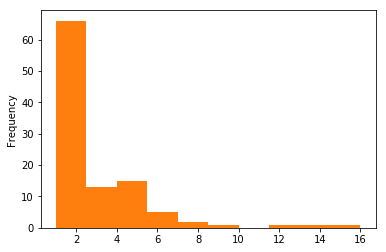

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

centuries['Runs'].value_counts().plot(kind='hist', bins=10, alpha=0.5)
plt.hist(centuries['Runs'].value_counts(), bins=10)
plt.show()


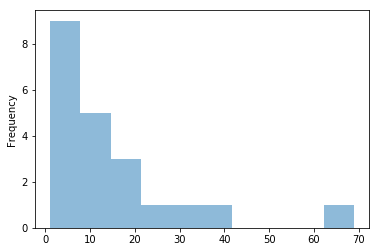

In [39]:
centuries['4s'].value_counts().plot(kind='hist', bins=10, alpha=0.5)

In [42]:
popularity = pd.read_csv('https://raw.githubusercontent.com/murali0861/upgrad_ml_ai/master/Data%20cleaning/popularity.csv')
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


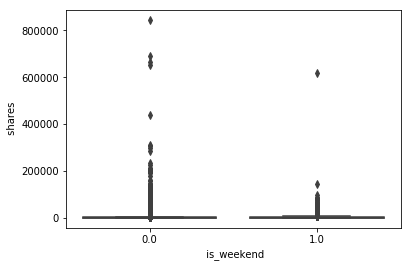

In [74]:
# plt.figimage
import seaborn as sns

weekend_shares = popularity[ (popularity[' is_weekend'] == 1.0)]
weekend_shares = weekend_shares[ weekend_shares[' shares'] < 40000 ]

# popularity.boxplot(column=' shares')

# plt.figure(figsize=(20,10)) 

# plt.boxplot(colu popularity[' shares'], =' is_weekend')


# popularity.boxplot(column=[' shares'], by=' is_weekend')

sns.boxplot(y=popularity[' shares'], x=popularity[' is_weekend'])
plt.show()

# popularity.groupby(' shares').count()

In [81]:
first_quantile = popularity[' shares'].quantile(0.25)
third_quantile = popularity[' shares'].quantile(0.75)


In [82]:
weekend_shares_outliers = popularity[ (popularity[' shares'] >= first_quantile) & (popularity[' shares'] <= third_quantile)  ]

weekend_shares_outliers.shape

(20111, 61)

<function matplotlib.pyplot.show(*args, **kw)>

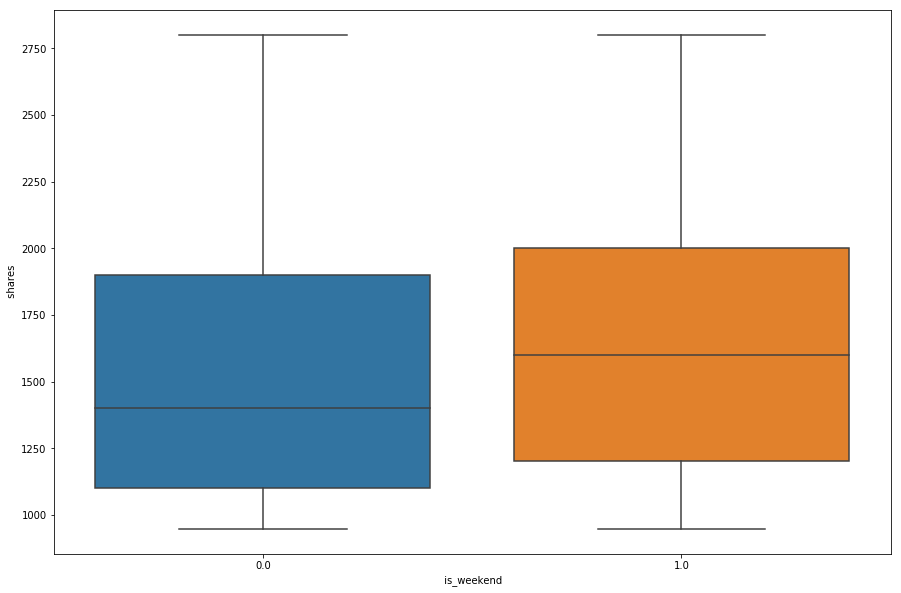

In [87]:
plt.figure(figsize=(15,10)) 
sns.boxplot(y=weekend_shares_outliers[' shares'], x=weekend_shares_outliers[' is_weekend'])
plt.show

###  Shares vs weekend

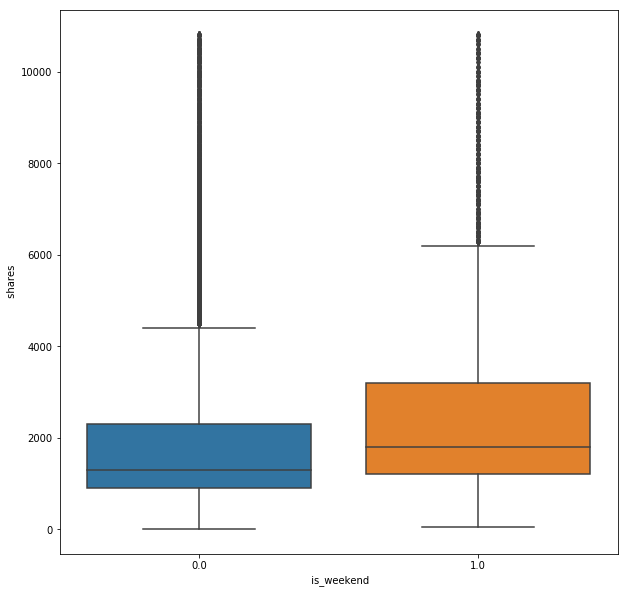

In [92]:
ninty_five = popularity[' shares'].quantile(0.95)
outliers_per = popularity[ (popularity[' shares'] <= ninty_five) ]
plt.figure(figsize=(10, 10))
sns.boxplot(x=outliers_per[' is_weekend'], y=outliers_per[' shares'])
plt.show()

###  Shares vs weekday

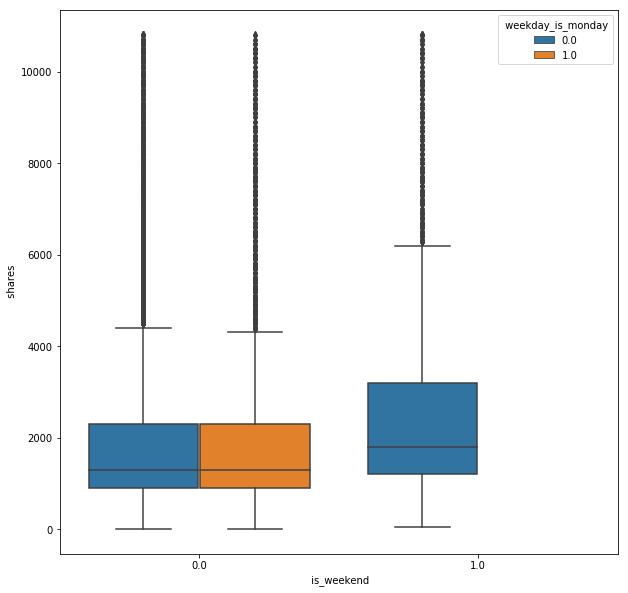

In [105]:
ninty_five = popularity[' shares'].quantile(0.95)
outliers_per = popularity[ (popularity[' shares'] <= ninty_five) ]
plt.figure(figsize=(10, 10))
sns.boxplot(x=outliers_per[' is_weekend'], y=outliers_per[' shares'], hue=outliers_per[' weekday_is_monday'])
plt.show()
# outliers_per.columns


In [110]:
popularity[' num_keywords'].mode()

0    7.0
dtype: float64

In [113]:
popularity[' shares'].mean()

3395.3801836343455

In [116]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [118]:
popularity[' shares'].median()

1400.0

In [139]:
seventy_quantile = popularity[' shares'].quantile(0.78)
popularity[' shares'].describe(percentiles= [0.78])
# seventy_quantile

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
50%        1400.000000
78%        3100.000000
max      843300.000000
Name:  shares, dtype: float64

In [135]:
popularity[ popularity[' shares'] <= seventy_quantile ]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710
10,http://mashable.com/2013/01/07/cosmic-events-d...,731.0,9.0,1248.0,0.490050,1.0,0.731638,11.0,0.0,1.0,...,0.100000,1.000000,-0.415064,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,2200


In [131]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [145]:
ninty_five = popularity[' shares'].quantile(0.95)
ninty_file_popularity = popularity[ popularity[' shares'] <= ninty_five ]
ninty_file_popularity[' shares'].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [147]:
popularity.size

2418284

In [150]:
ninty_file_popularity.size / popularity.size

0.950030269397639

In [152]:
(popularity[ popularity[' shares'] > ninty_five ].size) / (popularity.size)

0.04996973060236101

###  Segmentation Univariate

In [157]:
students = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/547dea8e-f823-421c-b1a7-765554424b57/EDA_nas.csv')
students.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

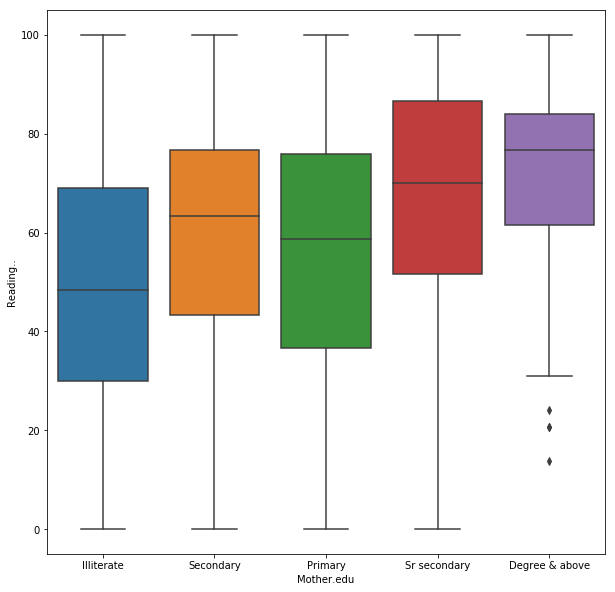

In [161]:
plt.figure(figsize=(10,10))
sns.boxplot(y=students['Reading..'], x=students['Mother.edu'])
plt.show()


In [163]:
census_data = pd.read_csv('EDA_census_mani.csv')
census_data.head()

,Table Name,State Code,Distt Code.,Area Name,Total/Rural/Urban/,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma or certificate Persons,Technical diploma or certificate Males,Technical diploma or certificate Females,Graduate & above Persons,Graduate & above Males,Graduate & above Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,NaN
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,136465,75715,60750,NaN
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,96524,52561,43963,NaN
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,70452,38456,31996,NaN


In [165]:
census_data.columns

Index(['Table Name', 'State Code', 'Distt Code.', 'Area Name',
       'Total/Rural/Urban/', 'Age-group', 'Total Persons', 'Total Males',
       'Total Females', 'Illiterate Persons', 'Illiterate Males',
       'Illiterate Females', 'Literate Persons', 'Literate Males',
       'Literate Females', 'Literate without\t educational level Persons',
       'Literate without\t educational level Males',
       'Literate without\t educational level Females', 'Below primary Persons',
       'Below primary Males', 'Below primary Females', 'Primary Persons',
       'Primary Males', 'Primary Females', 'Middle Persons', 'Middle Males',
       'Middle Females', 'Matric/Secondary Persons', 'Matric/Secondary Males',
       'Matric/Secondary Females', 'Higher secondary/Intermediate Persons',
       'Higher secondary/Intermediate Males',
       'Higher secondary/Intermediate Females',
       'Non-technical diploma or certificate not equal to degree Persons',
       'Non-technical diploma or certificate no

In [168]:
filtered_data = census_data[ (census_data['Area Name'] == 'INDIA') & (census_data['Age-group'] == '20-24') & (census_data['Total/Rural/Urban/'] == 'Total') ]
filtered_data


,Table Name,State Code,Distt Code.,Area Name,Total/Rural/Urban/,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma or certificate Persons,Technical diploma or certificate Males,Technical diploma or certificate Females,Graduate & above Persons,Graduate & above Males,Graduate & above Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45
15,C2308,0,0,INDIA,Total,20-24,111424222,57584693,53839529,18679492,...,1888379,1322758,565621,13170028,7029489,6140539,283366,156685,126681,NaN


In [171]:
filtered_data['Illiterate Females'] / filtered_data['Total Females'] * 100

15    22.683085
dtype: float64

In [193]:
filtered_data = census_data[ (census_data['Area Name'] == 'INDIA') & (census_data['Total/Rural/Urban/'] == 'Total') ]

filtered_data.loc[:, 'age_percentage'] = filtered_data['Illiterate Persons'] / filtered_data['Total Persons'] * 100
filtered_data[['Age-group', 'age_percentage']]

,Age-group,age_percentage
0,All ages,36.933916
1,0-6,100.000000
2,7,27.181342
3,8,15.319478
4,9,10.637962
5,10,11.306929
6,11,8.037174
7,12,8.578766
8,13,7.456446
9,14,8.317250


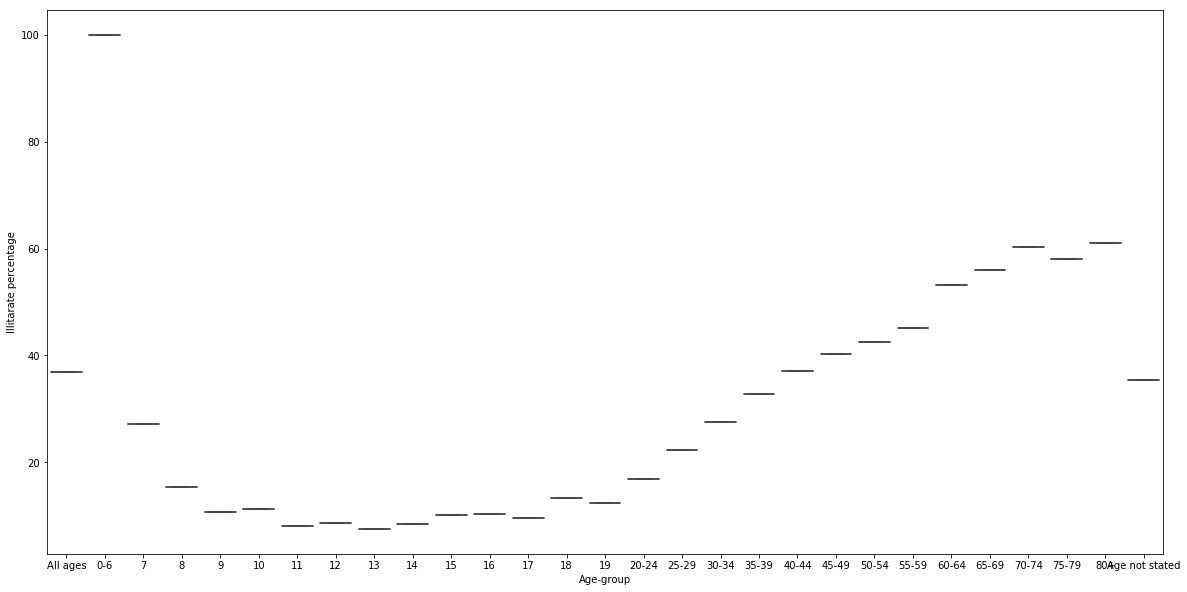

In [189]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=filtered_data['Age-group'], y=filtered_data['age_percentage'])
plt.ylabel('Illitarate percentage')
plt.show()

In [194]:

filtered_data1 = census_data[ (census_data['Area Name'] != 'INDIA') & (census_data['Total/Rural/Urban/'] == 'Total') ]
filtered_data1.loc[:, 'Literate percentage'] = filtered_data['Literate Females'] / filtered_data['Total Females'] * 100
filtered_data1.head()

,Table Name,State Code,Distt Code.,Area Name,Total/Rural/Urban/,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma or certificate Males,Technical diploma or certificate Females,Graduate & above Persons,Graduate & above Males,Graduate & above Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45,Literate percentage
87,C2308,1,0,State - JAMMU & KASHMIR,Total,All ages,12541302,6640662,5900640,5474069,...,33854,16968,653764,401279,252485,33609,19744,13865,NaN,NaN
88,C2308,1,0,State - JAMMU & KASHMIR,Total,0-6,2018905,1084355,934550,2018905,...,0,0,0,0,0,0,0,0,NaN,NaN
89,C2308,1,0,State - JAMMU & KASHMIR,Total,7,270538,142123,128415,91361,...,0,0,0,0,0,2036,1166,870,NaN,NaN
90,C2308,1,0,State - JAMMU & KASHMIR,Total,8,285314,150470,134844,59762,...,0,0,0,0,0,1646,942,704,NaN,NaN
91,C2308,1,0,State - JAMMU & KASHMIR,Total,9,252100,133371,118729,38753,...,0,0,0,0,0,1214,722,492,NaN,NaN


In [210]:
groupby_data = filtered_data1.groupby('Area Name').agg({'Total Females': 'sum', 'Literate Females': 'sum'})
groupby_data['Literate Females'] / groupby_data['Total Females'] * 100 

Area Name
State - ANDAMAN & NICOBAR ISLANDS    73.098869
State - ANDHRA PRADESH               52.933654
State - ARUNACHAL PRADESH            48.690609
State - ASSAM                        56.395015
State - BIHAR                        41.942968
State - CHANDIGARH                   71.630436
State - CHHATTISGARH                 51.698178
State - DADRA & NAGAR HAVELI         53.824300
State - DAMAN & DIU                  68.602199
State - GOA                          76.405363
State - GUJARAT                      60.861621
State - HARYANA                      57.392908
State - HIMACHAL PRADESH             67.612451
State - JAMMU & KASHMIR              47.495899
State - JHARKHAND                    46.367131
State - KARNATAKA                    60.204679
State - KERALA                       83.038221
State - LAKSHADWEEP                  78.245614
State - MADHYA PRADESH               50.484341
State - MAHARASHTRA                  67.053112
State - MANIPUR                      61.290791
Sta

In [211]:
groupby_data = filtered_data1.groupby('Area Name').agg({'Total Persons': 'sum', 'Literate Persons': 'sum'})
groupby_data['Literate Persons'] / groupby_data['Total Persons'] * 100 

Area Name
State - ANDAMAN & NICOBAR ISLANDS    77.324144
State - ANDHRA PRADESH               59.773345
State - ARUNACHAL PRADESH            55.358102
State - ASSAM                        61.456892
State - BIHAR                        50.436916
State - CHANDIGARH                   76.312284
State - CHHATTISGARH                 60.206705
State - DADRA & NAGAR HAVELI         64.947383
State - DAMAN & DIU                  77.454604
State - GOA                          79.907511
State - GUJARAT                      67.990681
State - HARYANA                      65.475466
State - HIMACHAL PRADESH             73.416288
State - JAMMU & KASHMIR              56.351669
State - JHARKHAND                    55.559581
State - KARNATAKA                    66.531016
State - KERALA                       84.223710
State - LAKSHADWEEP                  81.511641
State - MADHYA PRADESH               59.001861
State - MAHARASHTRA                  72.573770
State - MANIPUR                      66.828210
Sta

###  DateTime

In [212]:
import datetime

In [215]:
datetime.date(2019, 9, 20)

datetime.date(2019, 9, 20)

In [216]:
datetime.date.today()

datetime.date(2019, 4, 27)

In [222]:
today = datetime.date.today()

# ISO weekday will be from 1 to 7 & 
# normal weekdays will be from 0 to 6
print(today.weekday())
print(today.isoweekday())

5
6


In [225]:
timedelta = datetime.timedelta(days=7)
today + timedelta

datetime.date(2019, 5, 4)

In [227]:
today - timedelta

datetime.date(2019, 4, 20)

In [235]:
bday = datetime.date(1993, 7, 29)
no_of_days = today - bday
no_of_days

datetime.timedelta(days=9403)

In [239]:
t = datetime.time(20, 30, 40, 100)
print(t)

20:30:40.000100


In [242]:
current_time = datetime.datetime.now()
print(current_time)

2019-04-27 11:39:15.320988


In [247]:
print(current_time.year)
print(current_time.month)
print(current_time.day)

2019
4
27


In [249]:
# ===> timezone import
import pytz

In [257]:
date = datetime.datetime.now()
print(date)

date_india = datetime.datetime.now(tz=pytz.timezone('Asia/Kolkata'))
print(date_india)

2019-04-27 12:15:06.324939
2019-04-27 12:15:06.325141+05:30


In [260]:
pytz.all_timezones


['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

### Bivariate correlation:

In [273]:
eda_prices = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/f576c028-2da5-4a92-ae6b-d6d4d55a8400/EDA_Gold_Silver_prices.csv')
eda_prices.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [264]:
eda_prices.corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


In [290]:
eda_prices['DateFormat'] = pd.to_datetime(eda_prices['Month'], format='%b-%y')

eda_prices[ eda_prices['DateFormat'].dt.year == 2008 ].corr()
# eda_prices['Month'].dt.year == 1997

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.009584
GoldPrice,0.009584,1.000000


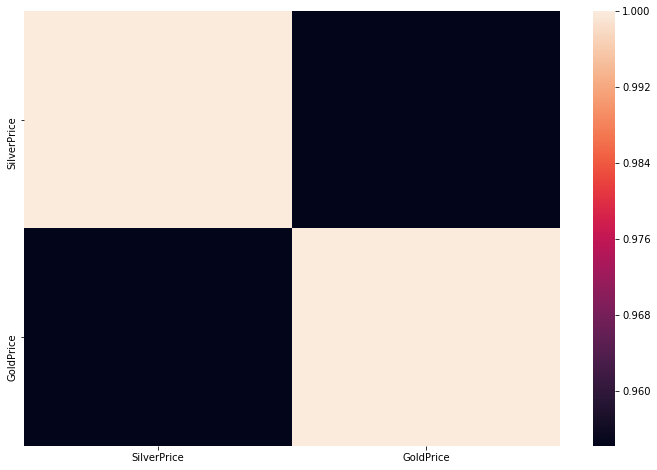

<function matplotlib.pyplot.show(*args, **kw)>

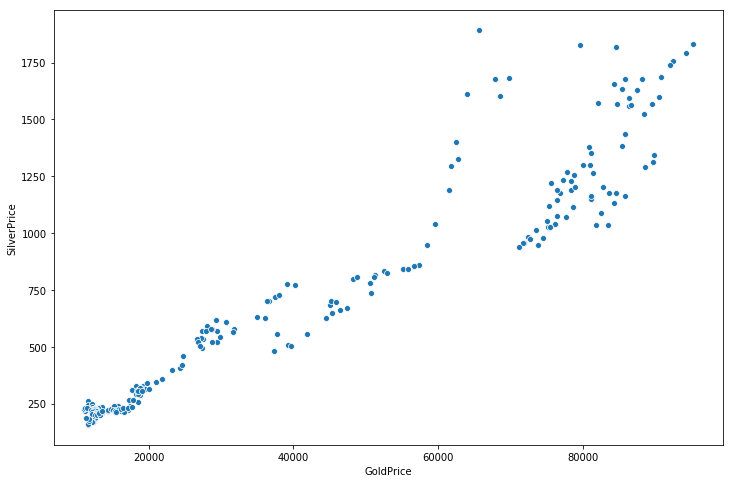

In [311]:
plt.figure(figsize=(12, 8))
t = eda_prices[['SilverPrice', 'GoldPrice']]
sns.heatmap(t.corr(), xticklabels=t.columns.values, yticklabels=t.columns.values)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=eda_prices, x='GoldPrice', y='SilverPrice')
plt.show

In [313]:
currencies = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/cbad0178-edd3-4120-bef2-104dd77a0065/currencies.csv')
currencies.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


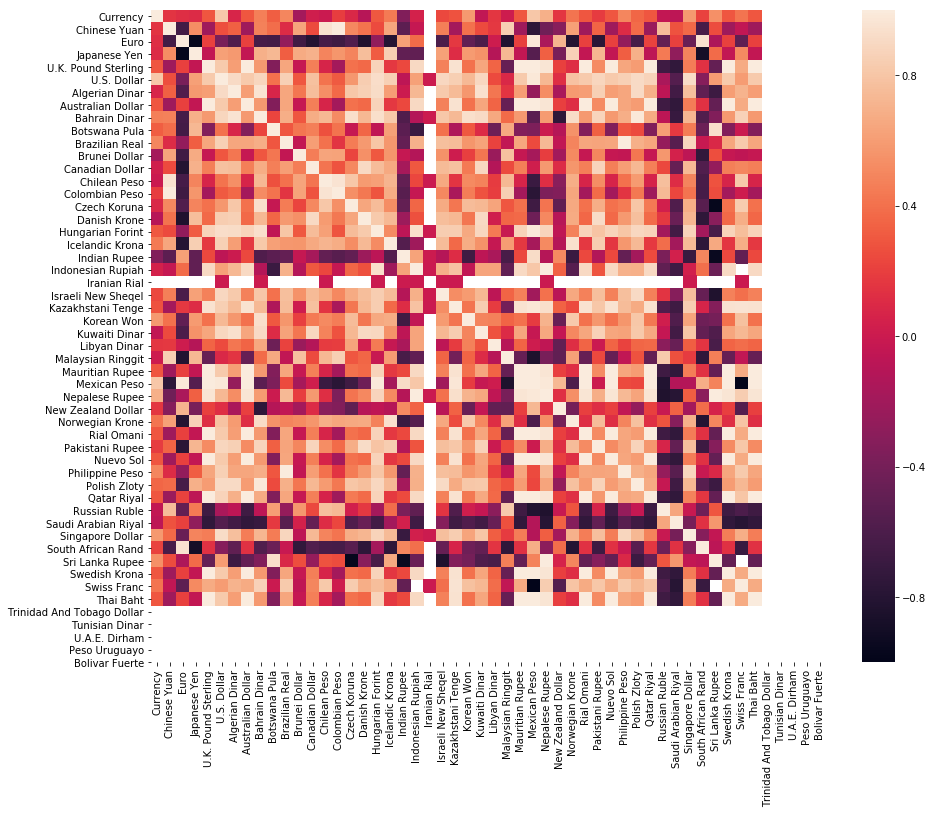

In [317]:
plt.figure(figsize=(15, 12))
sns.heatmap(currencies.corr(), xticklabels=currencies.columns.values, yticklabels=currencies.columns.values)
plt.show()

In [340]:
_corr = currencies.corr()
print(_corr.loc[['Indian Rupee']])

              Chinese Yuan      Euro  Japanese Yen  U.K. Pound Sterling  \
Indian Rupee       0.30405  0.243851     -0.270123             0.314681   

              U.S. Dollar  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
Indian Rupee     0.872862        0.923232           0.921475       0.873195   

              Botswana Pula  Brazilian Real       ...        \
Indian Rupee       0.930798       -0.056475       ...         

              South African Rand  Sri Lanka Rupee  Swedish Krona  Swiss Franc  \
Indian Rupee            0.897567         0.872443      -0.186991    -0.655866   

              Thai Baht  Trinidad And Tobago Dollar  Tunisian Dinar  \
Indian Rupee   0.868087                   -0.186861       -0.618041   

              U.A.E. Dirham  Peso Uruguayo  Bolivar Fuerte  
Indian Rupee       0.872859       0.758479         0.87317  

[1 rows x 47 columns]


In [342]:
_corr.columns

Index(['Chinese Yuan', 'Euro', 'Japanese Yen', 'U.K. Pound Sterling',
       'U.S. Dollar', 'Algerian Dinar', 'Australian Dollar', 'Bahrain Dinar',
       'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar',
       'Chilean Peso', 'Czech Koruna', 'Danish Krone', 'Hungarian Forint',
       'Icelandic Krona', 'Indian Rupee', 'Israeli New Sheqel',
       'Kazakhstani Tenge', 'Kuwaiti Dinar', 'Libyan Dinar',
       'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso',
       'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Rial Omani',
       'Pakistani Rupee', 'Nuevo Sol', 'Philippine Peso', 'Polish Zloty',
       'Qatar Riyal', 'Russian Ruble', 'Saudi Arabian Riyal',
       'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee',
       'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.A.E. Dirham',
       'Peso Uruguayo', 'Bolivar Fuerte'],
      dtype='object')

In [343]:
_corr.loc[['Japanese Yen'], ['U.S. Dollar']]

,U.S. Dollar
Japanese Yen,0.210295


In [344]:
_corr.loc[['Australian Dollar'], ['Indian Rupee']]

,Indian Rupee
Australian Dollar,0.921475


In [345]:
_corr.loc[['Japanese Yen'], ['U.K. Pound Sterling']]

,U.K. Pound Sterling
Japanese Yen,-0.970308


In [346]:
_corr.loc[['Chinese Yuan'], ['Euro']]

,Euro
Chinese Yuan,0.151596


### Bivariant analysis graded questions:

In [348]:
student_marks = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/fbd7538c-5926-45ba-92b1-8c35c0ca890d/nas.csv')
student_marks.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [354]:
result = students[ students['Mother.edu'] == 'Illiterate' ]
result.groupby('Siblings')['Siblings'].count()

Siblings
1 sibling       533
2 siblings      923
3 siblings      532
4+ siblings     469
Single child     88
Name: Siblings, dtype: int64

In [357]:
pd.pivot_table(result, index='Siblings', aggfunc='count')

,Age,Answer.English.WB,Answer.English.aloud,Below.poverty,Category,Computer.use,Conduct.experiments,Correct.Lang.HW,Correct.Math.HW,Correct.Scie.HW,...,Solve.Maths.in.groups,Solve.science.problems,State,Subjects,Use.Internet,Use.calculator,Use.computer,Use.dictionary,Watch.TV,X..Books
Siblings,,,,,,,,,,,,,,,,,,,,,
1 sibling,510,533,533,414,494,526,513,527,527,527,...,530,508,533,527,374,374,374,374,531,478
2 siblings,905,917,917,762,863,917,895,915,915,915,...,917,892,923,916,641,641,641,641,917,822
3 siblings,525,530,530,454,501,525,505,520,520,520,...,525,511,532,518,344,344,344,344,528,467
4+ siblings,456,468,468,391,435,463,457,463,463,463,...,468,448,469,458,306,306,306,306,468,414
Single child,83,86,86,65,75,87,82,81,81,81,...,84,77,88,85,67,67,67,67,87,80


In [362]:
result = students[students['Age'] != '11- years'] 
result.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [368]:
pd.pivot_table(result, index=['Father.edu', 'Age'], aggfunc='mean')['Science..']

Father.edu      Age      
Degree & above  12 years     46.752857
                13 years     44.805143
                14 years     42.676944
                15 years     29.090000
                16+ years    32.730000
Illiterate      12 years     29.870000
                13 years     33.758968
                14 years     35.319478
                15 years     33.413333
                16+ years    33.116786
Primary         12 years     34.121667
                13 years     37.617555
                14 years     36.700267
                15 years     35.162768
                16+ years    32.364000
Secondary       12 years     33.593810
                13 years     38.164402
                14 years     36.738859
                15 years     32.872800
                16+ years    30.960000
Sr secondary    12 years     40.113750
                13 years     39.046503
                14 years     39.050278
                15 years     38.615714
                16+ years    31.513333

In [370]:
result.groupby(['Age', 'Father.edu'])['Science..'].mean()

Age        Father.edu    
12 years   Degree & above    46.752857
           Illiterate        29.870000
           Primary           34.121667
           Secondary         33.593810
           Sr secondary      40.113750
13 years   Degree & above    44.805143
           Illiterate        33.758968
           Primary           37.617555
           Secondary         38.164402
           Sr secondary      39.046503
14 years   Degree & above    42.676944
           Illiterate        35.319478
           Primary           36.700267
           Secondary         36.738859
           Sr secondary      39.050278
15 years   Degree & above    29.090000
           Illiterate        33.413333
           Primary           35.162768
           Secondary         32.872800
           Sr secondary      38.615714
16+ years  Degree & above    32.730000
           Illiterate        33.116786
           Primary           32.364000
           Secondary         30.960000
           Sr secondary      31.513333

In [373]:
student_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/a9f77398-61fd-405a-8904-b1685c1913ca/nas.csv')
student_data.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [375]:
student_data.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [379]:
student_data['Solve.science.problems'].head()

0       Agree
1       Agree
2       Agree
3       Agree
4    Disagree
Name: Solve.science.problems, dtype: object

In [383]:
print(student_data.loc[0, :])

STUID                                  26011001001
State                                  Maharashtra
District                                         1
Gender                                        Girl
Age                                       13 years
Category                                         3
Same.language                                    2
Siblings                                 1 sibling
Handicap                                        No
Father.edu                              Illiterate
Mother.edu                              Illiterate
Father.occupation                           Farmer
Mother.occupation                           Farmer
Below.poverty                                  Yes
Use.calculator                                 NaN
Use.computer                                   NaN
Use.Internet                                   NaN
Use.dictionary                                 NaN
Read.other.books                                No
X..Books                       

In [385]:
cust_rating = pd.read_csv('https://query.data.world/s/ILc-P4llUraMaYN6N6Bdw7p6kUvHnj')
cust_rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [387]:

cust_rating['avg_rating'] = round( (cust_rating['rating'] + cust_rating['food_rating'] + cust_rating['service_rating'] ) / 3)
cust_rating.head()

,userID,placeID,rating,food_rating,service_rating,avg_rating
0,U1077,135085,2,2,2,2.0
1,U1077,135038,2,2,1,2.0
2,U1077,132825,2,2,2,2.0
3,U1077,135060,1,2,2,2.0
4,U1068,135104,1,1,2,1.0


###  Derived Metrics : business driven

In [421]:
cricket_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/8b53879b-f766-48ea-869e-99f0226b3888/odi-batting.csv')
cricket_data.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57


In [422]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50284 entries, 0 to 50283
Data columns (total 8 columns):
Country      50284 non-null object
Player       50284 non-null object
Runs         50284 non-null int64
MatchDate    50284 non-null object
Weekday      50284 non-null object
Ground       50284 non-null object
Versus       50284 non-null object
Balls        50284 non-null int64
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [423]:
cricket_data[ cricket_data['Runs'] >= 100 ].groupby('Player')['Runs'].count().sort_values(ascending=False).head()

Player
Sachin R Tendulkar     48
Ricky T Ponting        30
Sanath T Jayasuriya    28
Sourav C Ganguly       22
Herschelle H Gibbs     21
Name: Runs, dtype: int64

In [424]:
cricket_data['century'] =  cricket_data['Runs'].apply(lambda x: 1 if (x >= 100) else 0)
cricket_data.groupby('Player')['century'].sum().sort_values(ascending=False).head()

Player
Sachin R Tendulkar     48
Ricky T Ponting        30
Sanath T Jayasuriya    28
Sourav C Ganguly       22
Herschelle H Gibbs     21
Name: century, dtype: int64

In [425]:
cricket_data['strike_rate'] = round((cricket_data['Runs'] / cricket_data['Balls'])*100) 
cricket_data[cricket_data['century'] == 1].sort_values('strike_rate', ascending=False).head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,century,strike_rate
28157,Pakistan,Shahid Afridi,102,04-10-1996,Fri,Gymkhana Club Ground,Sri Lanka,40,1,255.0
28158,Pakistan,Shahid Afridi,102,15-04-2005,Fri,Green Park,India,46,1,222.0
34446,South Africa,Mark V Boucher,147,20-09-2006,Wed,Senwes Park,Zimbabwe,68,1,216.0
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,1,207.0
36753,Sri Lanka,Sanath T Jayasuriya,134,02-04-1996,Tue,Padang Cricket Ground,Pakistan,65,1,206.0


In [438]:
cricket_data['MatchDate'] = pd.to_datetime(cricket_data['MatchDate'], format='%d-%m-%Y')
cricket_data['year'] = cricket_data['MatchDate'].dt.year
cricket_data[(cricket_data['Country'] == 'India') & (cricket_data['century'] == 1)].groupby('year')['century'].sum().sort_values(ascending=False).head()


year
1998    18
1999    15
2009    13
2010    12
2005    11
Name: century, dtype: int64

In [452]:
pd.options.display.max_colwidth = 100

In [523]:
eda_grades = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/05e69f76-61d8-4774-8dec-78dad8015018/grades.csv')
eda_grades.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,01/03/17-15:27:49


In [561]:
# eda_grades.submission.str.extract('(^\d*)')
# eda_grades.submission.str.extract('([A-Z]\w{0,})([A-Z]\w{0,})([A-Z]\w{0,})')
# eda_grades.submission.str.extract('(..........\....$)')

,0,1
0,/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b,02/DDA1610095.zip
1,/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d,4/DDA1610288.zip


In [538]:
eda_grades['submit_time'] = pd.to_datetime(eda_grades['submit_time'], format='%m/%d/%y-%H:%M:%S')

In [553]:
eda_grades['year'], eda_grades['month'], eda_grades['day'] = eda_grades['submit_time'].dt.year, eda_grades['submit_time'].dt.month, eda_grades['submit_time'].dt.day
eda_grades['hour'] = eda_grades['submit_time'].dt.hour
eda_grades.head()

,submission,submit_time,year,month,day,hour
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52,2017,1,3,20
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21,2017,1,3,20
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08,2017,1,3,22
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19,2017,1,2,21
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49,2017,1,3,15


In [569]:
eda_grades[eda_grades['submission'].str.contains('.zip', regex=True)].size / eda_grades.size

0.9545454545454546

In [584]:
dead_line_date = datetime.datetime(2017, 1, 3, 23, 59, 59)
print(dead_line_date)

2017-01-03 23:59:59


In [585]:
eda_grades[eda_grades['submit_time'] > dead_line_date].shape

(44, 6)

In [596]:
eda_grades['submission_date'] = eda_grades['submit_time'].dt.date
eda_grades.groupby('submission_date')['submission'].count()

submission_date
2016-11-19      1
2016-12-19      1
2016-12-21      1
2016-12-28      2
2016-12-29      2
2016-12-30      6
2016-12-31      1
2017-01-01      6
2017-01-02     14
2017-01-03    120
2017-01-04     12
2017-01-06      1
2017-01-07      2
2017-01-08      3
2017-01-09     21
2017-01-10      3
2017-01-17      1
2017-02-03      1
Name: submission, dtype: int64

In [599]:
eda_grades.groupby('hour')['submission'].count()

hour
0     10
1      8
2      2
3      3
4      2
6      1
8      1
9      1
10     3
11     1
12     3
13     6
14     6
15     4
16     2
17     4
18     6
19     2
20    16
21    27
22    24
23    66
Name: submission, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


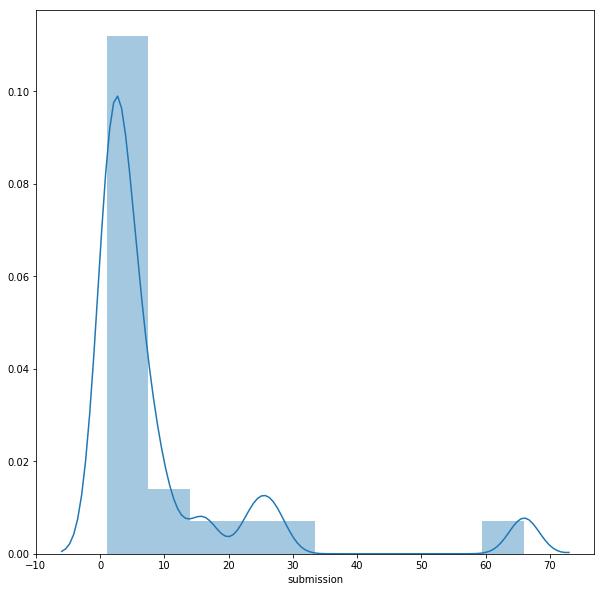

In [602]:
plt.figure(figsize=(10,10))
sns.distplot(eda_grades.groupby('hour')['submission'].count(), bins=10)
plt.show()